In [1]:
import tensorflow as tf 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img , img_to_array
import numpy as np 
import os 
from pathlib import Path

In [2]:
image_test_path = r'C:\Users\Farouk\Desktop\age-prediction\data\data-raw\images (1).jpg'

In [3]:
import cv2
# Load and convert the image
image = cv2.imread(image_test_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [4]:
from ultralytics import YOLO

# Replace with your model architecture if necessary (default YOLOv5 model)
model2 = YOLO(r'C:\Users\Farouk\Desktop\age-prediction\outputs\logs\Yolo_logs\runs\detect\train\weights\best.pt')  # You can start with any YOLOv5 model architecture

# Load your weights manually


In [5]:
prediction =model2(image_rgb)[0]


0: 480x640 6 Human Faces, 165.3ms
Speed: 4.6ms preprocess, 165.3ms inference, 14.9ms postprocess per image at shape (1, 3, 480, 640)


In [6]:
import cv2

image = cv2.imread(image_test_path)

# Dessiner les détections sur l'image
for box in prediction.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])  # Coordonnées du rectangle
    confidence = box.conf[0].item()  # Confiance
    class_id = int(box.cls[0].item())  # ID de la classe détectée
    label = f"{model2.names[class_id]} {confidence:.2f}"  # Nom + Confiance

    # Dessiner le rectangle et afficher le texte
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Afficher l'image avec les prédictions
# cv2.imshow("YOLO Detection", image)


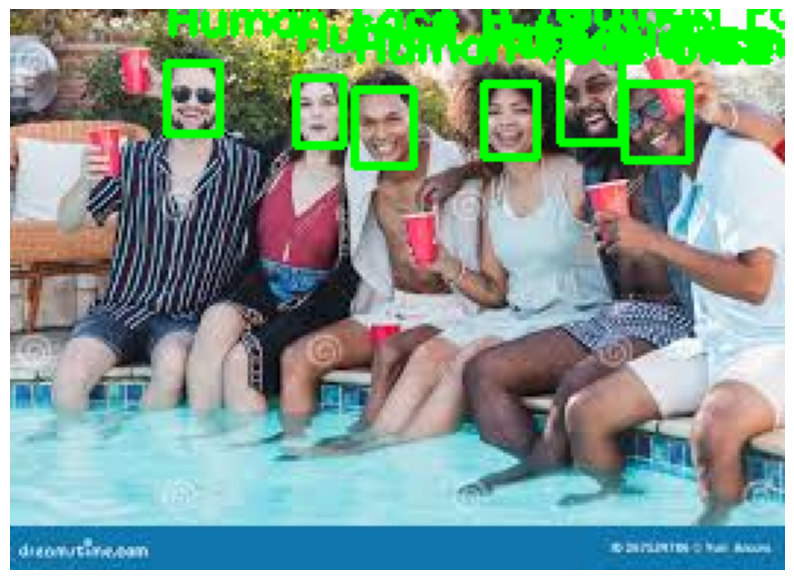

In [24]:
import matplotlib.pyplot as plt 

# Convert BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()